Challenge I: Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:
- What is the median engine size in liters?
- What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?
- What is the correlation between fuel consumption and CO2 emissions?
- Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
- What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
- Any other insights you found during your analysis?


In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
cars =  pd.read_csv("C:\\Users\\dell\\Downloads\\co2_emissions_canada.csv")
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [3]:
cars.info() #The dataset is pretty clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [4]:
cars.describe()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


In [5]:
cars['Fuel Type'].unique()


array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [6]:
# Question 1:What is the median engine size in liters?
cars['Engine Size(L)'].median()

3.0

In [8]:
# To find the value counts for Fuel type
cars['Fuel Type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel Type, dtype: int64

In [13]:
#Question 2:What is the average fuel consumption for regular gasoline?
cars.groupby(['Fuel Type'])['Fuel Consumption Comb (L/100 km)'].mean() #To find the average fuel consumption for each fuel type

Fuel Type
D     8.835429
E    16.861351
N    12.700000
X    10.084575
Z    11.422767
Name: Fuel Consumption Comb (L/100 km), dtype: float64

#### N.B: From the above, it can be shown that the avaerage fuel consumption for regular gasoline(Z) is 11.42

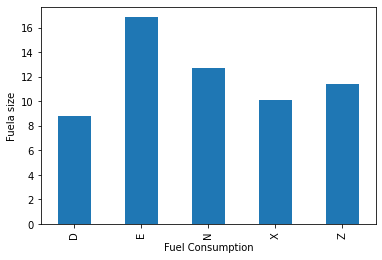

In [14]:
#Visualizing question 2
avg_viz = cars.groupby(['Fuel Type'])['Fuel Consumption Comb (L/100 km)'].mean()
avg_viz.plot(kind= 'bar') #to plot bar chart
plt.ylabel('Fuel size')
plt.xlabel('Fuel Consumption') #labelling the axis
plt.show() #to show the chart

<AxesSubplot:>

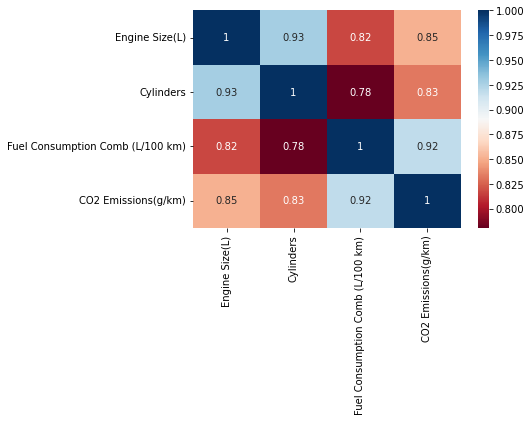

In [18]:
#Question 3: What is the correlation between fuel consumption and CO2 emissions?
cars.corr() #to show correlation between fuel consumption and CO2 emissions
sns.heatmap(cars.corr(),cmap='RdBu', annot= True)

#### N.B: The relationship between Fuel consumption and CO2 emmission is 0.92...this shows a high positive correlation

In [31]:
cars['Vehicle Class'].value_counts() #to show value counts for vehicle class

SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

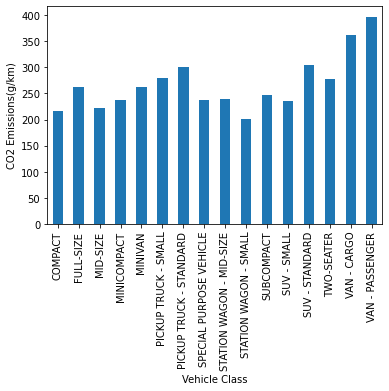

In [36]:
#Question 4:Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
avg_viz1 = cars.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean()
avg_viz1.plot(kind= 'bar', fontsize= 10) #to show horizontal bar chart 
plt.ylabel('CO2 Emissions(g/km)')
plt.xlabel('Vehicle Class')
plt.show()

#### From the above chart it can be seen that 'Mid-size' has a lower CO2 Emissions than 'SUV-Small'

In [37]:
#Question 5a:What are the average CO2 emissions for all vehicles?
cars.groupby(['Make'])['CO2 Emissions(g/km)'].mean() #mean CO2 emission for all vehicle make

Make
ACURA            223.652778
ALFA ROMEO       224.900000
ASTON MARTIN     339.617021
AUDI             250.846154
BENTLEY          362.934783
BMW              254.007590
BUGATTI          522.000000
BUICK            233.058252
CADILLAC         265.854430
CHEVROLET        264.346939
CHRYSLER         246.170455
DODGE            276.361789
FIAT             192.246575
FORD             260.988854
GENESIS          284.840000
GMC              299.917683
HONDA            190.219626
HYUNDAI          208.871429
INFINITI         254.064815
JAGUAR           267.987500
JEEP             250.342629
KIA              214.294372
LAMBORGHINI      400.780488
LAND ROVER       287.647059
LEXUS            241.112360
LINCOLN          267.302083
MASERATI         318.147541
MAZDA            193.672222
MERCEDES-BENZ    277.386635
MINI             196.588235
MITSUBISHI       200.505263
NISSAN           236.864865
PORSCHE          258.941489
RAM              292.402062
ROLLS-ROYCE      388.480000
SCION          

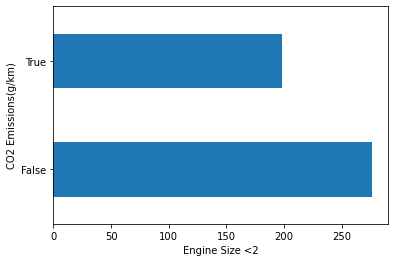

In [46]:
#Question 5b:For vehicles with an engine size of 2.0 liters or smaller?
veh = cars.groupby(cars['Engine Size(L)']<=2.0)['CO2 Emissions(g/km)'].mean()
veh.plot(kind='barh')
plt.ylabel('CO2 Emissions(g/km)')
plt.xlabel('Engine Size <2')
plt.show()


### Summary

- We have more vehicles using regular gasoline
- The variables show quite a high positive correlation with each other, although some of them are more correlated that the others
- The median engine size is 3.0
- Vehicles that use Ethanol as fuel type have the highest average fuel consumption
- Station Wagon-Small has the lowest CO2 Emission, while Van-Passenger has the highest CO2 Emission
- Vehicles that have engine size of <=2.0 produce about 200g/km on an average